In [34]:
pip install dash


In [33]:
!pip install notebook

In [ ]:
!jupyter notebook

|DEBUG|Paths used for configuration of jupyter_notebook_config: 
    	/etc/jupyter/jupyter_notebook_config.json
|DEBUG|Paths used for configuration of jupyter_notebook_config: 
    	/usr/local/etc/jupyter/jupyter_notebook_config.d/ipyparallel.json
    	/usr/local/etc/jupyter/jupyter_notebook_config.d/panel-client-jupyter.json
    	/usr/local/etc/jupyter/jupyter_notebook_config.json
|DEBUG|Paths used for configuration of jupyter_notebook_config: 
    	/usr/etc/jupyter/jupyter_notebook_config.json
|DEBUG|Paths used for configuration of jupyter_notebook_config: 
    	/root/.local/etc/jupyter/jupyter_notebook_config.json
|DEBUG|Paths used for configuration of jupyter_notebook_config: 
    	/root/.jupyter/jupyter_notebook_config.json

  _   _          _      _
 | | | |_ __  __| |__ _| |_ ___
 | |_| | '_ \/ _` / _` |  _/ -_)
  \___/| .__/\__,_\__,_|\__\___|
       |_|
                       
Read the migration plan to Notebook 7 to learn about the new features and the actions to take if you 

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

In [ ]:

data=pd.read_csv('https://storage.googleapis.com/covid19-open-data/v3/location/US.csv')
data.head()

,location_key,date,place_id,wikidata_id,datacommons_id,country_code,country_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level,...,search_trends_xeroderma,search_trends_xerostomia,search_trends_yawn,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm,dew_point,relative_humidity
0,US,2020-01-01,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,2.65,0.36,0.17,-0.975309,-5.913580,6.314815,0.0,64.77,-5.790123,70.015448
1,US,2020-01-02,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,2.60,0.39,0.16,2.660494,-1.648148,6.709877,0.0,40.64,-0.759259,78.356538
2,US,2020-01-03,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,2.46,0.38,0.16,1.055556,-2.648148,5.703704,0.0,30.48,-2.475309,77.390895
3,US,2020-01-04,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,2.71,0.38,0.17,0.006173,-6.617284,9.197531,0.0,30.48,-5.407407,67.237910
4,US,2020-01-05,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,2.81,0.38,0.17,5.203704,0.543210,8.580247,0.0,NaN,-2.790123,56.438457


In [ ]:
print(data.describe())
print(data['new_confirmed'].describe())

       aggregation_level  new_confirmed  new_deceased    new_tested  \
count              991.0   9.880000e+02     988.00000  8.400000e+02   
mean                 0.0   9.290546e+04    1000.02834  1.086630e+06   
std                  0.0   1.264354e+05     865.17391  5.971515e+05   
min                  0.0   0.000000e+00       0.00000  3.480000e+02   
25%                  0.0   2.699375e+04     379.25000  6.613455e+05   
50%                  0.0   5.583850e+04     752.00000  1.011313e+06   
75%                  0.0   1.194122e+05    1419.50000  1.496003e+06   
max                  0.0   1.235521e+06    4133.00000  3.201706e+06   

       cumulative_confirmed  cumulative_deceased  cumulative_tested  \
count          9.880000e+02         9.880000e+02       8.400000e+02   
mean           3.557368e+07         5.036650e+05       4.103864e+08   
std            3.039155e+07         3.415858e+05       2.972203e+08   
min            0.000000e+00         0.000000e+00       3.480000e+02   
25%  

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

data = pd.read_csv('https://storage.googleapis.com/covid19-open-data/v3/location/US.csv', parse_dates=['date'])
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data.set_index('date', inplace=True)

min_year = data.index.year.min()
max_year = data.index.year.max()

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Contagios de COVID 19 en los Estados Unidos"),
    html.P("Selecciona una fecha para ver los casos confirmados:"),
    dcc.Graph(id='cases-graph'),
    dcc.Slider(
        id='date-slider',
        min=min_year,
        max=max_year,
        value=min_year,
        marks={str(year): str(year) for year in range(min_year, max_year + 1)},
        step=None
    )
])

@app.callback(
    Output('cases-graph', 'figure'),
    [Input('date-slider', 'value')]
)
def update_figure(selected_year):
    filtered_data = data[data.index.year == selected_year]
    fig = px.line(filtered_data, x=filtered_data.index, y='new_confirmed', title=f'Casos Confirmados en {selected_year}')
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Muertes por COVID-19 en los Estados Unidos"),
    html.P("Selecciona una fecha para ver los datos de muertes:"),
    dcc.Graph(id='deaths-graph'),
    dcc.Slider(
        id='date-slider',
        min=data.index.min().year,
        max=data.index.max().year,
        value=data.index.min().year,
        marks={str(year): str(year) for year in data.index.year.unique()},
        step=None
    )
])

@app.callback(
    Output('deaths-graph', 'figure'),
    [Input('date-slider', 'value')]
)
def update_figure(selected_year):
    filtered_data = data[data.index.year == selected_year]
    fig = px.line(filtered_data, x=filtered_data.index, y='new_deceased', title=f'Muertes en {selected_year}')
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
import plotly.express as px
import pandas as pd

data = data.copy()

male_cases = data['new_confirmed_male'].sum()
female_cases = data['new_confirmed_female'].sum()
gender_cases = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Cases': [male_cases, female_cases]
})

fig = px.pie(gender_cases, values='Cases', names='Gender', title='Cantidad de Infectados por Género')
fig.show()


In [ ]:
import plotly.express as px
import pandas as pd


data = data.copy()


fig = px.line(data,
              x=data.index,
              y=['mobility_retail_and_recreation', 'mobility_grocery_and_pharmacy',
                 'mobility_parks', 'mobility_transit_stations', 'mobility_workplaces',
                 'mobility_residential', 'school_closing'],
              title='Movilidad y Cierre de Escuelas a lo largo del Tiempo',
              labels={'value': 'Movilidad/Cierre de Escuelas', 'variable': 'Métrica', 'date': 'Fecha'})


fig.show()


In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

data = data.copy()


app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Movilidad y Cierre de Escuelas a lo largo del Tiempo"),
    dcc.Dropdown(
        id='metric-dropdown',
        options=[
            {'label': 'Retail & Recreation', 'value': 'mobility_retail_and_recreation'},
            {'label': 'Grocery & Pharmacy', 'value': 'mobility_grocery_and_pharmacy'},
            {'label': 'Parks', 'value': 'mobility_parks'},
            {'label': 'Transit Stations', 'value': 'mobility_transit_stations'},
            {'label': 'Workplaces', 'value': 'mobility_workplaces'},
            {'label': 'Residential', 'value': 'mobility_residential'},
            {'label': 'School Closing', 'value': 'school_closing'},
            {'label': 'Workplace Closing', 'value': 'workplace_closing'},
            {'label': 'Cancel Public Events', 'value': 'cancel_public_events'},
            {'label': 'Restrictions on Gatherings', 'value': 'restrictions_on_gatherings'},
            {'label': 'Public Transport Closing', 'value': 'public_transport_closing'},
            {'label': 'Stay at Home Requirements', 'value': 'stay_at_home_requirements'},
            {'label': 'Restrictions on Internal Movement', 'value': 'restrictions_on_internal_movement'},
            {'label': 'International Travel Controls', 'value': 'international_travel_controls'}
        ],
        value='mobility_retail_and_recreation',
        multi=False,
        clearable=False
    ),
    dcc.Slider(
        id='year-slider',
        min=data.index.year.min(),
        max=data.index.year.max(),
        value=data.index.year.min(),
        marks={str(year): str(year) for year in data.index.year.unique()},
        step=None
    ),
    dcc.Graph(id='interactive-graph'),
])

@app.callback(
    Output('interactive-graph', 'figure'),
    [Input('metric-dropdown', 'value'), Input('year-slider', 'value')]
)
def update_graph(selected_metric, selected_year):
    filtered_data = data[data.index.year == selected_year].copy()
    # Calcular la media móvil (suavizado)
    filtered_data['smoothed'] = filtered_data[selected_metric].rolling(window=7).mean()
    fig = px.line(filtered_data,
                  x=filtered_data.index,
                  y='smoothed',
                  title=f'{selected_metric} en {selected_year}',
                  labels={selected_metric: 'Valor', 'date': 'Fecha'})
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:

selected_columns = ['new_persons_vaccinated', 'new_confirmed', 'new_deceased','new_persons_fully_vaccinated','new_vaccine_doses_administered']


correlation_matrix = data[selected_columns].corr()

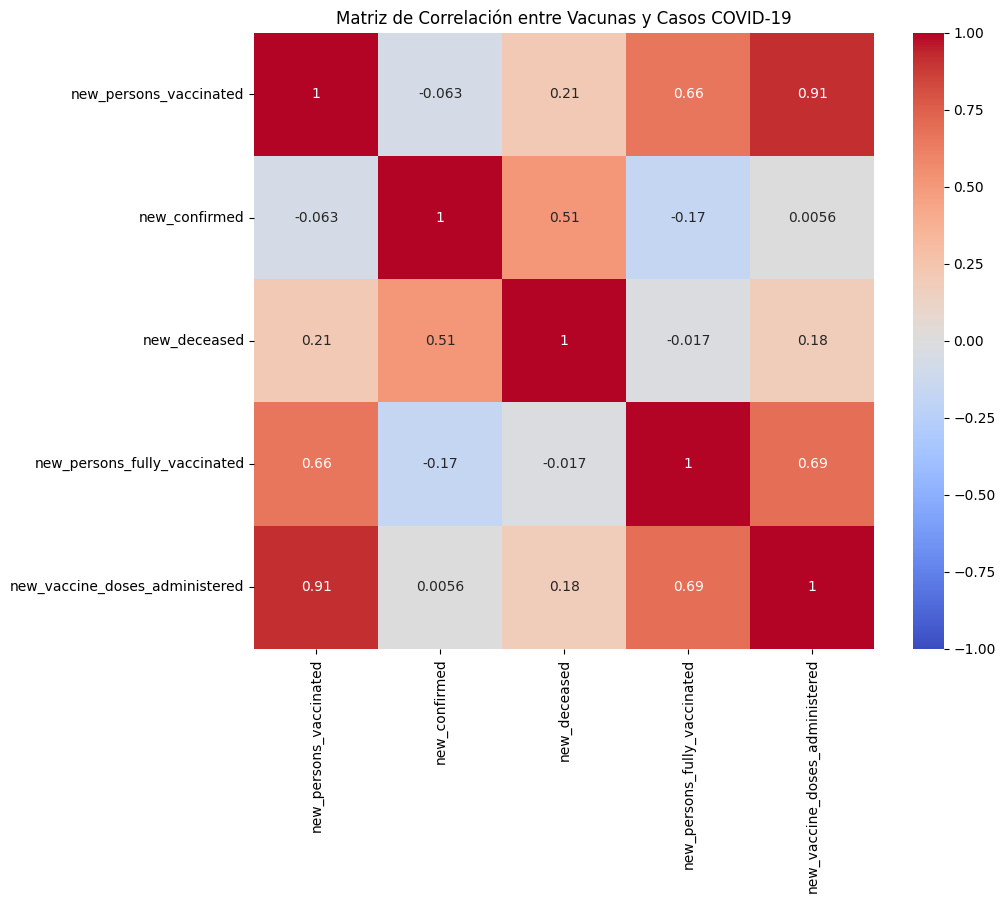

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación entre Vacunas y Casos COVID-19')
plt.show()


In [ ]:


fase1_inicio = '2020-01-01'
fase1_fin = '2020-12-31'
fase2_inicio = '2021-01-01'
fase2_fin = '2021-12-31'
fase3_inicio = '2022-01-01'
fase3_fin = '2022-08-31'

In [ ]:

segmentos = {

    'Fase 1': data[(data.index >= fase1_inicio) & (data.index <= fase1_fin)],
    'Fase 2': data[(data.index >= fase2_inicio) & (data.index <= fase2_fin)],
    'Fase 3': data[(data.index >= fase3_inicio) & (data.index <= fase3_fin)]
}


for fase, datos in segmentos.items():
    print(f"{fase}:\n", datos.head(), "\n")


Fase 1:
            location_key                     place_id wikidata_id  \
date                                                               
2020-01-01           US  ChIJCzYy5IS16lQRQrfeQ5K5Oxw         Q30   
2020-01-02           US  ChIJCzYy5IS16lQRQrfeQ5K5Oxw         Q30   
2020-01-03           US  ChIJCzYy5IS16lQRQrfeQ5K5Oxw         Q30   
2020-01-04           US  ChIJCzYy5IS16lQRQrfeQ5K5Oxw         Q30   
2020-01-05           US  ChIJCzYy5IS16lQRQrfeQ5K5Oxw         Q30   

           datacommons_id country_code              country_name  \
date                                                               
2020-01-01    country/USA           US  United States of America   
2020-01-02    country/USA           US  United States of America   
2020-01-03    country/USA           US  United States of America   
2020-01-04    country/USA           US  United States of America   
2020-01-05    country/USA           US  United States of America   

           iso_3166_1_alpha_2 iso_316

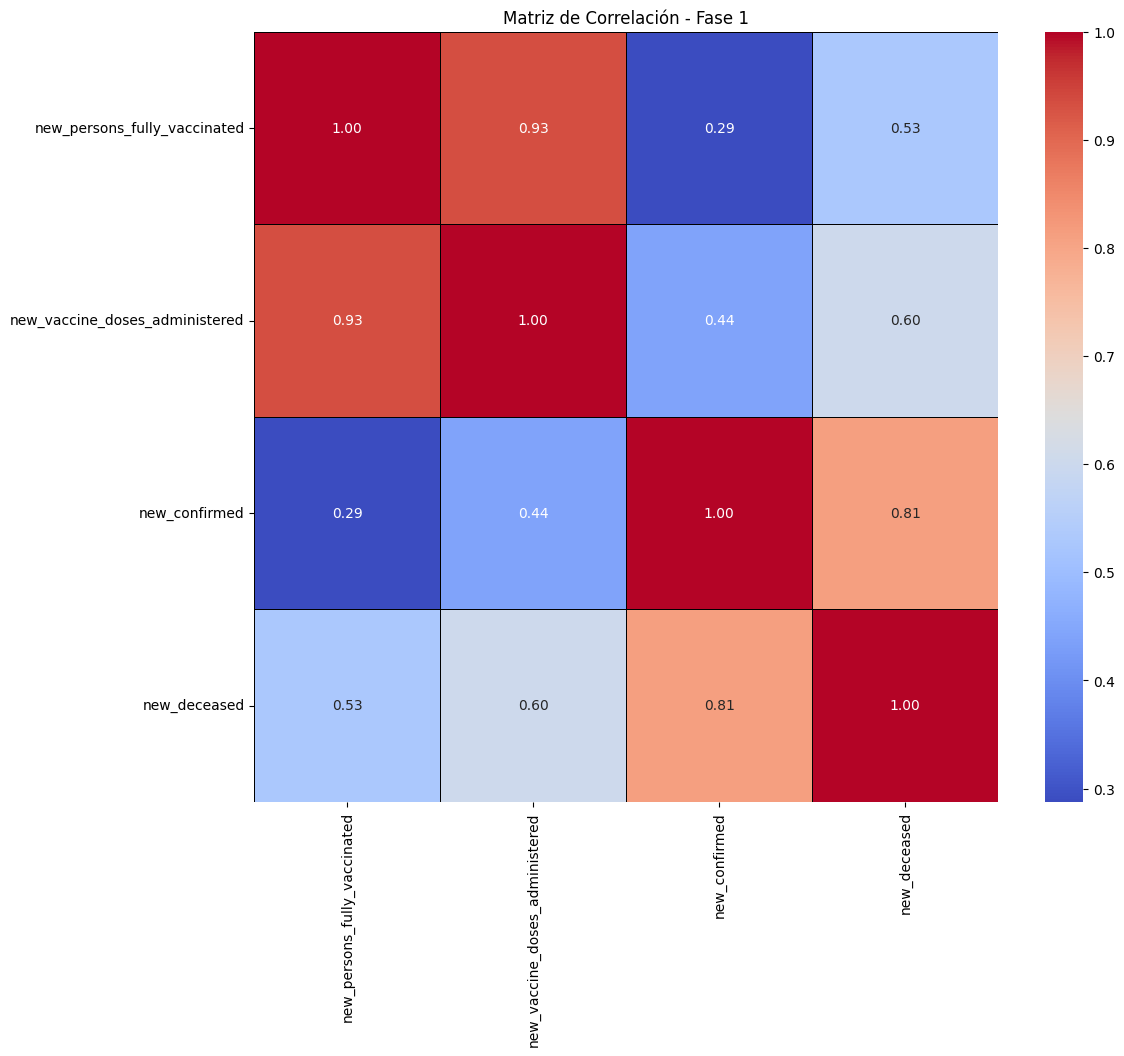

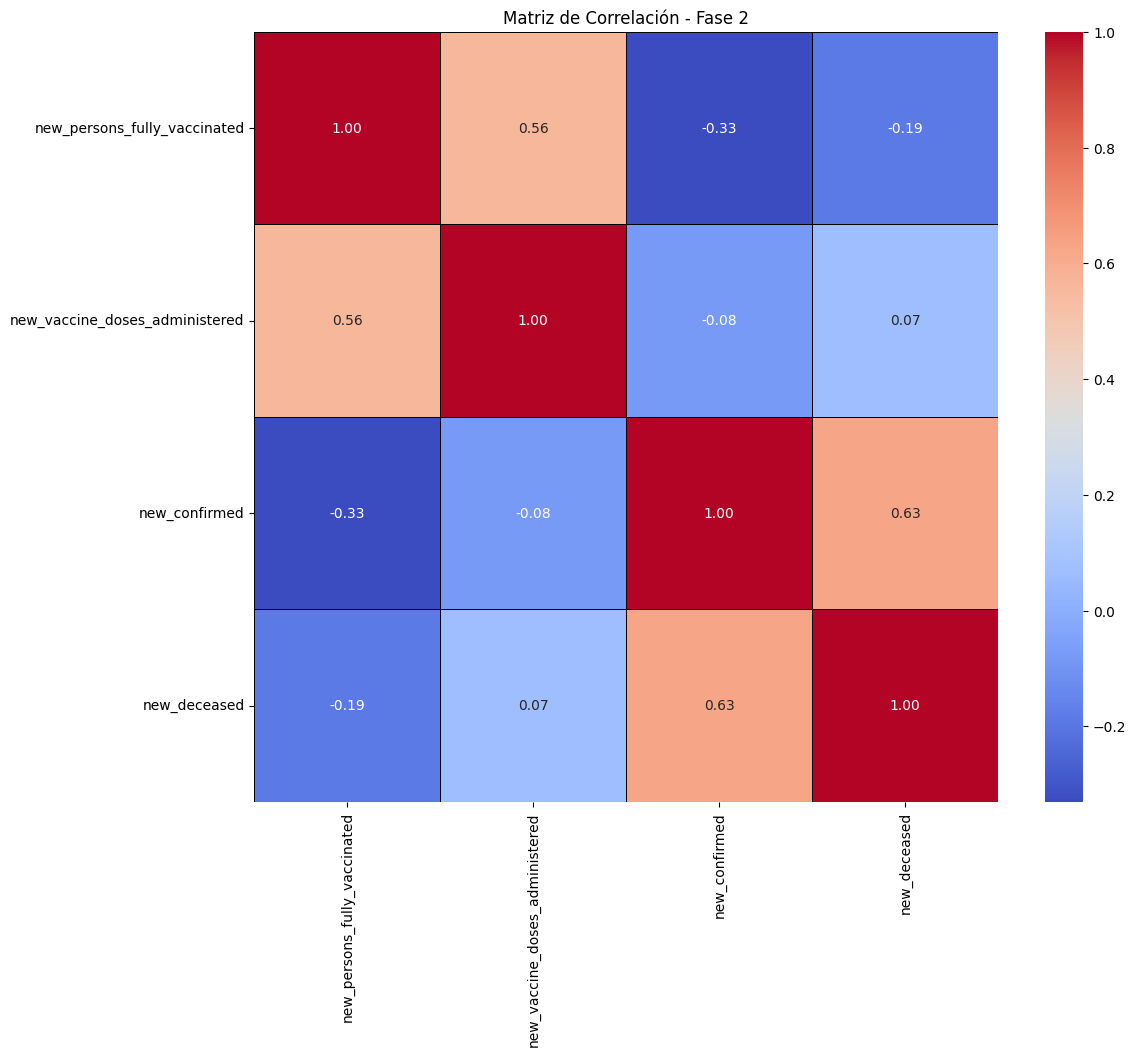

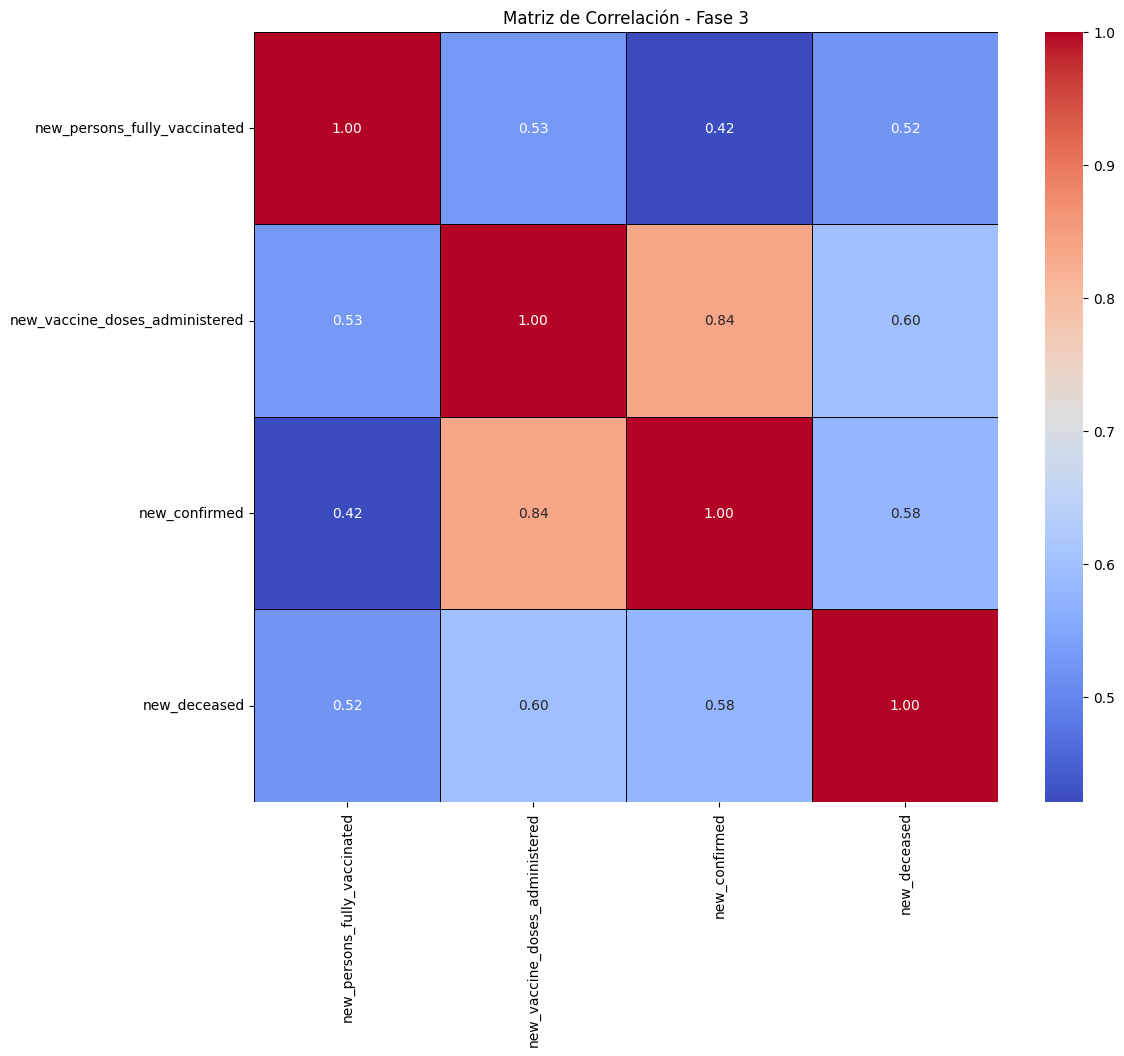

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_correlation_matrix(data, title):
    selected_columns = ['new_persons_fully_vaccinated','new_vaccine_doses_administered', 'new_confirmed', 'new_deceased',]
    correlation_matrix = data[selected_columns].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, linecolor='black')
    plt.title(title)
    plt.show()

for fase, datos in segmentos.items():
    plot_correlation_matrix(datos, f'Matriz de Correlación - {fase}')


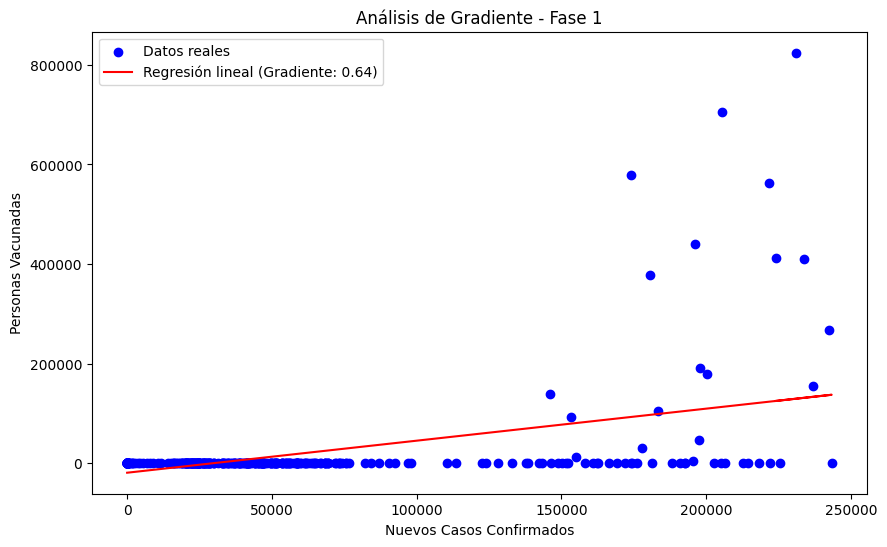

Gradiente: 0.64, Intercepto: -19383.25


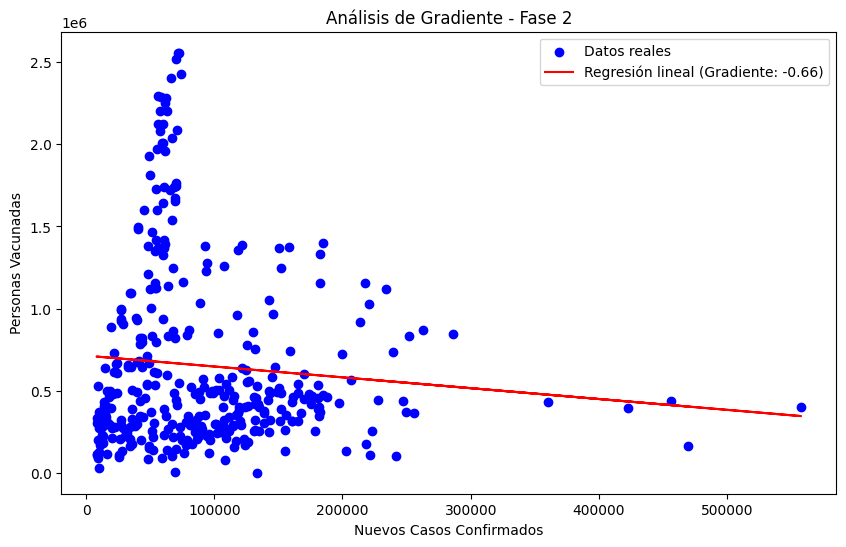

Gradiente: -0.66, Intercepto: 713923.43


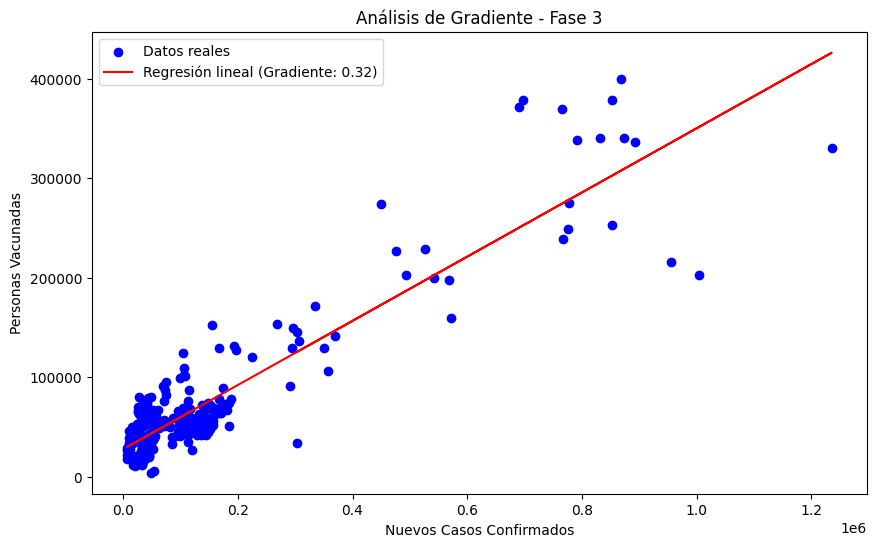

Gradiente: 0.32, Intercepto: 27618.60


In [ ]:

for fase, datos in segmentos.items():
    segmentos[fase] = datos.fillna(0)
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt


def plot_gradient(data, title):
    X = data[['new_confirmed']].values.reshape(-1, 1)  # Variable independiente
    y = data['new_persons_vaccinated'].values  # Variable dependiente

    model = LinearRegression()
    model.fit(X, y)

    gradient = model.coef_[0]
    intercept = model.intercept_

    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Datos reales')
    plt.plot(X, model.predict(X), color='red', label=f'Regresión lineal (Gradiente: {gradient:.2f})')
    plt.title(title)
    plt.xlabel('Nuevos Casos Confirmados')
    plt.ylabel('Personas Vacunadas')
    plt.legend()
    plt.show()

    print(f'Gradiente: {gradient:.2f}, Intercepto: {intercept:.2f}')


for fase, datos in segmentos.items():
    plot_gradient(datos, f'Análisis de Gradiente - {fase}')


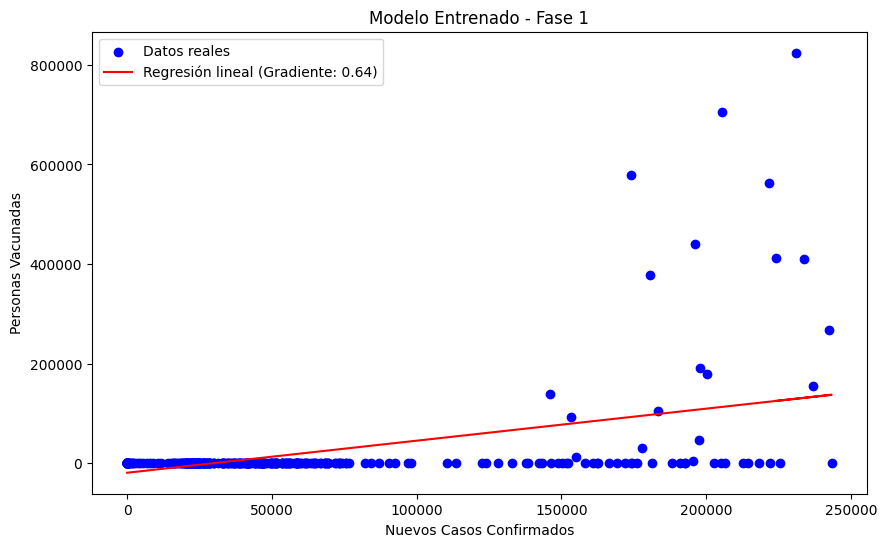

Gradiente: 0.64, Intercepto: -19383.25


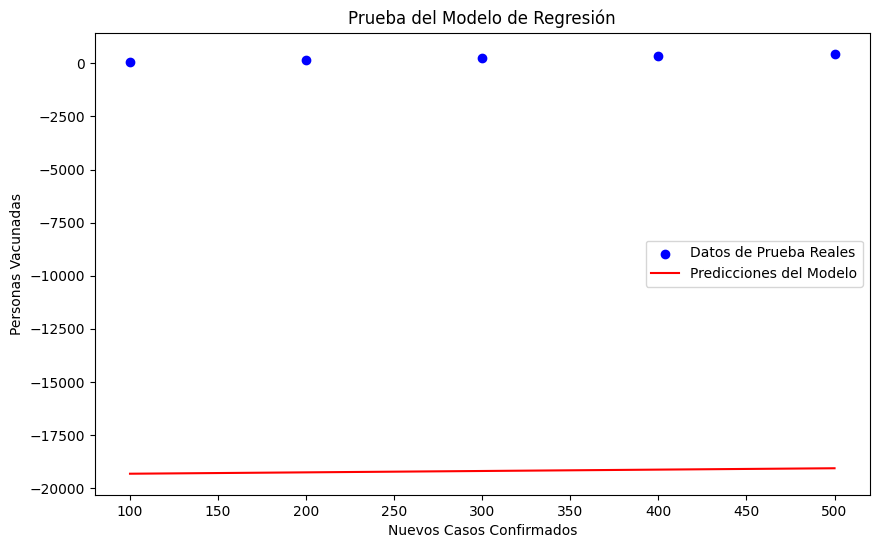

Error Cuadrático Medio (MSE): 377924070.98


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt


def plot_gradient(data, title):
    X = data[['new_confirmed']].values.reshape(-1, 1)  # Variable independiente
    y = data['new_persons_vaccinated'].values  # Variable dependiente

    model = LinearRegression()
    model.fit(X, y)

    gradient = model.coef_[0]
    intercept = model.intercept_

    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Datos reales')
    plt.plot(X, model.predict(X), color='red', label=f'Regresión lineal (Gradiente: {gradient:.2f})')
    plt.title(title)
    plt.xlabel('Nuevos Casos Confirmados')
    plt.ylabel('Personas Vacunadas')
    plt.legend()
    plt.show()

    print(f'Gradiente: {gradient:.2f}, Intercepto: {intercept:.2f}')

    return model

modelo_fase1 = plot_gradient(segmentos['Fase 1'], 'Modelo Entrenado - Fase 1')


def test_model(model, test_data):
    X_test = test_data[['new_confirmed']].values.reshape(-1, 1)
    y_test = test_data['new_persons_vaccinated'].values
    y_pred = model.predict(X_test)

    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', label='Datos de Prueba Reales')
    plt.plot(X_test, y_pred, color='red', label='Predicciones del Modelo')
    plt.title('Prueba del Modelo de Regresión')
    plt.xlabel('Nuevos Casos Confirmados')
    plt.ylabel('Personas Vacunadas')
    plt.legend()
    plt.show()


    mse = np.mean((y_test - y_pred) ** 2)
    print(f'Error Cuadrático Medio (MSE): {mse:.2f}')


test_data = pd.DataFrame({
    'new_confirmed': [100, 200, 300, 400, 500],
    'new_persons_vaccinated': [50, 150, 250, 350, 450]
})


test_model(modelo_fase1, test_data)

In [ ]:
import plotly.graph_objects as go
import pandas as pd


# Calcula la media móvil de 7 días
data['new_confirmed_7d_avg'] = data['new_confirmed'].rolling(window=7).mean()
data['new_persons_vaccinated_7d_avg'] = data['new_persons_vaccinated'].rolling(window=7).mean()
data['cumulative_persons_vaccinated_7d_avg'] = data['cumulative_persons_vaccinated'].rolling(window=7).mean()
data['cumulative_confirmed_7d_avg'] = data['cumulative_confirmed'].rolling(window=7).mean()

# Gráfico comparativo entre contagios y nuevas vacunas
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=data.index, y=data['new_confirmed_7d_avg'], mode='lines', name='Contagios (media móvil 7 días)', line=dict(color='red')))
fig1.add_trace(go.Scatter(x=data.index, y=data['new_persons_vaccinated_7d_avg'], mode='lines', name='Vacunas (media móvil 7 días)', line=dict(color='blue')))
fig1.update_layout(title='Comparación entre Contagios y Nuevas Vacunas', xaxis_title='Fecha', yaxis_title='Número de Personas')

# Gráfico comparativo entre contagios acumulados y vacunas acumuladas
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=data.index, y=data['cumulative_confirmed_7d_avg'], mode='lines', name='Contagios Acumulados (media móvil 7 días)', line=dict(color='red')))
fig2.add_trace(go.Scatter(x=data.index, y=data['cumulative_persons_vaccinated_7d_avg'], mode='lines', name='Vacunas Acumuladas (media móvil 7 días)', line=dict(color='blue')))
fig2.update_layout(title='Comparación entre Contagios Acumulados y Vacunas Acumuladas', xaxis_title='Fecha', yaxis_title='Número de Personas')

# Muestra los gráficos
fig1.show()
fig2.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd


# Calcula la media móvil de 7 días para los datos nuevos
data['new_confirmed_7d_avg'] = data['new_confirmed'].rolling(window=7).mean()
data['new_deceased_7d_avg'] = data['new_deceased'].rolling(window=7).mean()
data['new_tested_7d_avg'] = data['new_tested'].rolling(window=7).mean()

# Gráfico comparativo de datos nuevos
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=data.index, y=data['new_confirmed_7d_avg'], mode='lines', name='Nuevos Contagios (media móvil 7 días)', line=dict(color='red')))
fig1.add_trace(go.Scatter(x=data.index, y=data['new_deceased_7d_avg'], mode='lines', name='Nuevos Fallecidos (media móvil 7 días)', line=dict(color='black')))
fig1.add_trace(go.Scatter(x=data.index, y=data['new_tested_7d_avg'], mode='lines', name='Nuevas Pruebas (media móvil 7 días)', line=dict(color='blue')))
fig1.update_layout(title='Comparación de Datos Nuevos', xaxis_title='Fecha', yaxis_title='Número de Personas')

# Muestra el gráfico
fig1.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd


# Calcula la media móvil de 7 días para los datos nuevos

data['new_deceased_7d_avg'] = data['new_deceased'].rolling(window=7).mean()

# Gráfico comparativo de datos nuevos
fig1 = go.Figure()

fig1.add_trace(go.Scatter(x=data.index, y=data['new_deceased_7d_avg'], mode='lines', name='Nuevos Fallecidos (media móvil 7 días)', line=dict(color='black')))

fig1.update_layout(title='Comparación de Datos Nuevos', xaxis_title='Fecha', yaxis_title='Número de Personas')

# Muestra el gráfico
fig1.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd


# Normalizar los datos para que estén en una escala similar
data['new_deceased_normalized'] = data['new_deceased'] / data['new_deceased'].max()
data['new_persons_vaccinated_normalized'] = data['new_persons_vaccinated'] / data['new_persons_vaccinated'].max()

# Gráfico comparativo entre nuevos fallecidos y nuevas vacunaciones (normalizados)
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data['new_deceased_normalized'], mode='lines', name='Nuevos Fallecidos (normalizados)', line=dict(color='black')))
fig.add_trace(go.Scatter(x=data.index, y=data['new_persons_vaccinated_normalized'], mode='lines', name='Nuevas Vacunaciones (normalizados)', line=dict(color='blue')))
fig.update_layout(title='Comparación entre Nuevos Fallecidos y Nuevas Vacunaciones (normalizados)', xaxis_title='Fecha', yaxis_title='Valor Normalizado')

# Muestra el gráfico
fig.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Calcula la media móvil de 7 días para los datos acumulados
data['cumulative_confirmed_7d_avg'] = data['cumulative_confirmed'].rolling(window=7).mean()
data['cumulative_deceased_7d_avg'] = data['cumulative_deceased'].rolling(window=7).mean()
data['cumulative_tested_7d_avg'] = data['cumulative_tested'].rolling(window=7).mean()

# Gráfico comparativo de datos acumulados
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=data.index, y=data['cumulative_confirmed_7d_avg'], mode='lines', name='Contagios Acumulados (media móvil 7 días)', line=dict(color='red')))
fig2.add_trace(go.Scatter(x=data.index, y=data['cumulative_deceased_7d_avg'], mode='lines', name='Fallecidos Acumulados (media móvil 7 días)', line=dict(color='black')))
fig2.add_trace(go.Scatter(x=data.index, y=data['cumulative_tested_7d_avg'], mode='lines', name='Pruebas Acumuladas (media móvil 7 días)', line=dict(color='blue')))
fig2.update_layout(title='Comparación de Datos Acumulados', xaxis_title='Fecha', yaxis_title='Número de Personas')

# Muestra el gráfico
fig2.show()
